In [1]:
from abc import ABCMeta, abstractmethod

import numpy as np
import matplotlib.pyplot as plt

In [2]:
class GradientDescent(metaclass=ABCMeta):
    def __init__(self, max_iter: int = 300, extended_output: bool = False):
        self.max_iter = max_iter
        self.extended_output = extended_output
        self.f = list()
    
    @abstractmethod
    def _f(self, x: np.ndarray):
        raise NotImplementedError('The function _f is not implemented')
        
    @abstractmethod
    def _df(self, x: np.ndarray):
        raise NotImplementedError('The function _df is not implemented')
        
    @abstractmethod
    def _step_size(self, iteration: int):
        raise NotImplementedError('The function _step_size is not implemented')
        
    @abstractmethod
    def _retraction(self, x: np.ndarray):
        raise NotImplementedError('The function _retraction is not implemented')
        
    def optimize(self, x: np.ndarray):
        res = np.copy(x)
        if self.extended_output:
            self.f.append(self._f(res))
        for i in range(1, self.max_iter + 1):
            res -= self._df(res) * self._step_size(i)
            res = self._retraction(res)
            if self.extended_output:
                self.f.append(self._f(res))
        return res
    

class RayleighQuotient(GradientDescent):
    def __init__(self, A: np.ndarray, step_size: float = 1.0, max_iter: int = 300, extended_output: bool = False):
        super().__init__(max_iter=max_iter, extended_output=extended_output)
        self.A = A
        self.step_size = step_size
        
    def _f(self, x: np.ndarray) -> float:
        Ax = np.dot(self.A, x)
        xx = np.dot(x, x)
        return np.dot(Ax, x) / xx
    
    def _df(self, x: np.ndarray) -> np.ndarray:
        Ax = np.dot(self.A, x)
        xx = np.dot(x, x)
        f = np.dot(Ax, x) / xx
        return 2 * (Ax - f * x) / xx
    
    def _step_size(self, iteration: int) -> float:
        return self.step_size
    
    def _retraction(self, x: np.ndarray) -> np.ndarray:
        return x


class RayleighQuotientSphere(GradientDescent):
    def __init__(self, A: np.ndarray, step_size: float = 1.0, max_iter: int = 300, extended_output: bool = False):
        super().__init__(max_iter=max_iter, extended_output=extended_output)
        self.A = A
        self.step_size = step_size
        
    def _f(self, x: np.ndarray) -> float:
        Ax = np.dot(self.A, x)
        return np.dot(Ax, x)
    
    def _df(self, x: np.ndarray) -> np.ndarray:
        Ax = np.dot(self.A, x)
        f = np.dot(Ax, x)
        return 2 * (Ax - f * x)
    
    def _step_size(self, iteration: int) -> float:
        return self.step_size
    
    def _retraction(self, x: np.ndarray) -> np.ndarray:
        norm = np.linalg.norm(x)
        return x / norm if norm != 0 else 0

In [3]:
A = np.array([[2, 1], [1, 2]], dtype=float)
x0 = np.array([1, 0], dtype=float)
step_size = 0.01
max_iter = 1000
size = 1000

A = np.random.randn(size, size)
A = np.dot(A, A.T)
x0 = np.random.randn(size)
x0 /= np.linalg.norm(x0)

rq = RayleighQuotient(A=A, step_size=step_size, max_iter=max_iter, extended_output=True)
rqs = RayleighQuotientSphere(A=A, step_size=step_size, max_iter=max_iter, extended_output=True)

res1 = rq.optimize(x0)
res2 = rqs.optimize(x0)

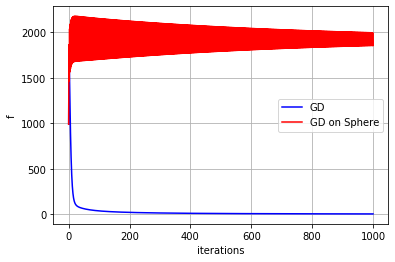

In [4]:
plt.plot(rq.f, 'b', label='GD')
plt.plot(rqs.f, 'r', label='GD on Sphere')
plt.grid(True)
plt.xlabel('iterations')
plt.ylabel('f')
plt.legend()
plt.show()